Real image


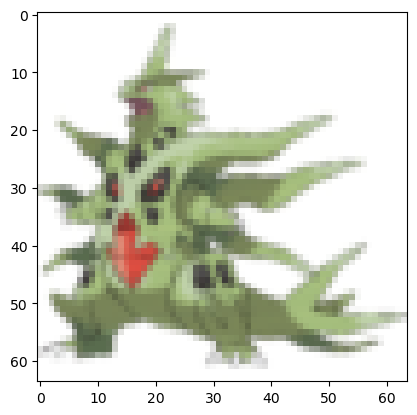

In [27]:
import matplotlib.pyplot as plt
from augment import DiffAugment
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.utils as vutils
import numpy as np


def get_dataset(folder, image_size, batch_size):
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # [-1, 1] range
    ])
    
    dataset = datasets.ImageFolder(root=folder, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataloader

dataloader = get_dataset("pokemon_images/", 64, 64)

real_batch = next(iter(dataloader))[0]
x = real_batch[0]
print("Real image")
plt.imshow((x.permute(1, 2, 0) + 1) / 2)
plt.show()

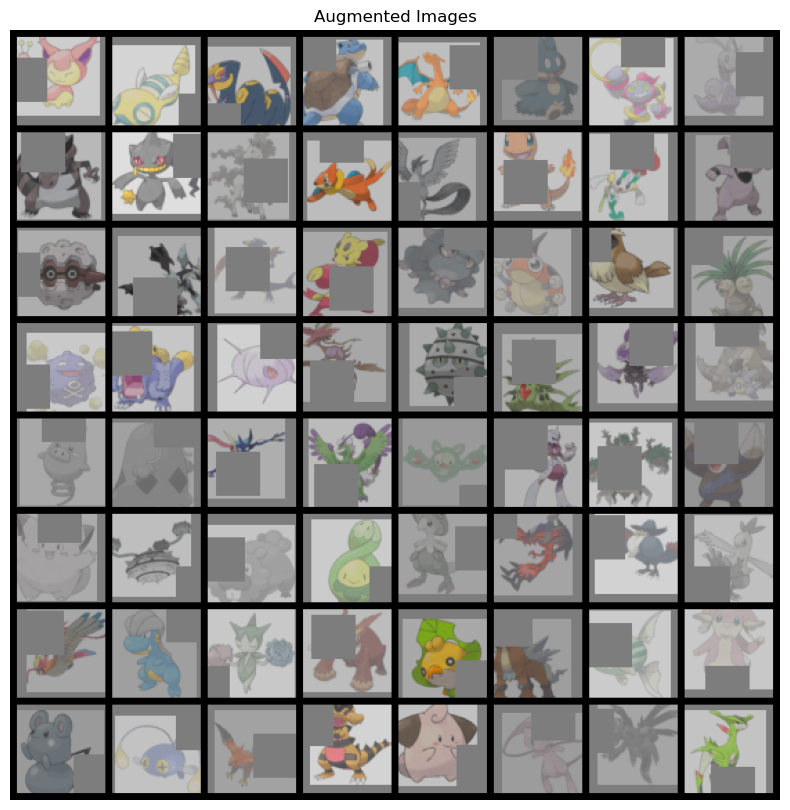

In [28]:
policy = 'color,translation,cutout'
plt.figure(figsize=(10,10))
plt.title("Augmented Images")
for i, data in enumerate(dataloader, 0):
    # Format batch
    real_cpu = data[0]
    aug = DiffAugment(real_cpu, policy=policy)
    plt.axis("off")
    plt.imshow(np.transpose(vutils.make_grid(aug, padding=5, normalize=True).cpu(),(1,2,0)))
    break
plt.show()

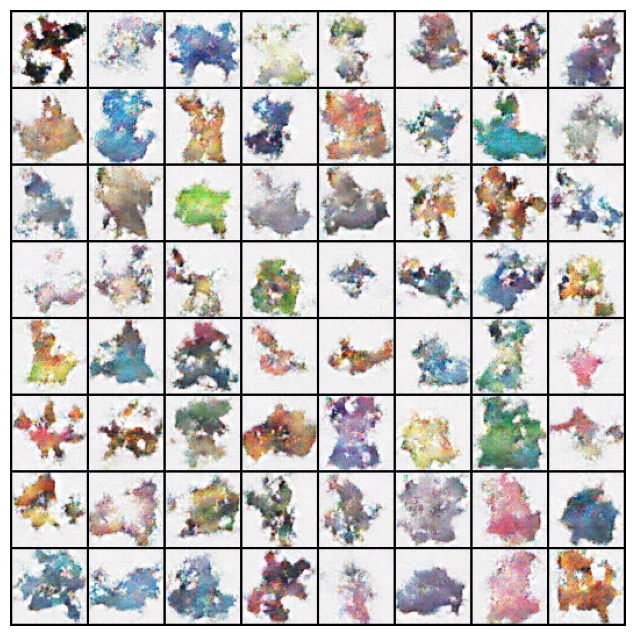

In [29]:
import matplotlib.animation as animation
import pickle
fig = plt.figure(figsize=(8,8))
plt.axis("off")
# ! Couldn't uploda this pickle file to github due to its size
# ! You have to generate it during the training process to create the gif
with open('output/img_list_no_aug.pkl', 'rb') as f:
    img_list = pickle.load(f)
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)
# Save animation
ani.save('output/train_progress.gif', writer='pillow', fps=1)